In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix


In [145]:
# Importing Dataset
# Dataset name: Spaceship Titanic (Kaggle)
# Dataset Link: https://www.kaggle.com/competitions/spaceship-titanic/data

dataset = pd.read_csv('spaceship_train.csv')  # Path may differ on another system

In [146]:
# Viewing fisrt 5 rows

dataset.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [175]:
#Viewing Columns
dataset.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [148]:
# Selecting required columnns only

filter_columns = [
    'HomePlanet',
    'Destination',
    'VIP',
    'CryoSleep',
    'Age',
    'Transported'

]

filter_data = dataset[filter_columns]

In [149]:
filter_data.head(6)

,HomePlanet,Destination,VIP,CryoSleep,Age,Transported
0,Europa,TRAPPIST-1e,False,False,39.0,False
1,Earth,TRAPPIST-1e,False,False,24.0,True
2,Europa,TRAPPIST-1e,True,False,58.0,False
3,Europa,TRAPPIST-1e,False,False,33.0,False
4,Earth,TRAPPIST-1e,False,False,16.0,True
5,Earth,PSO J318.5-22,False,False,44.0,True


In [151]:
# Encoding
enc = LabelEncoder()

filter_data['HomePlanet'] = enc.fit_transform(filter_data['HomePlanet'])
filter_data['Destination'] = enc.fit_transform(filter_data['Destination'])
filter_data['VIP'] = enc.fit_transform(filter_data['VIP'])
filter_data['CryoSleep'] = enc.fit_transform(filter_data['CryoSleep'])
filter_data['Transported'] = enc.fit_transform(filter_data['Transported'])

# Filling NaN values with mean value
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
filter_data['Age'] = imp.fit_transform(np.array(filter_data['Age']).reshape(-1,1))

# Scaling
sc = MinMaxScaler()
filter_data['Age'] = sc.fit_transform(np.array(filter_data['Age']).reshape(-1,1))


c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)
c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [152]:
filter_data.head(7)

,HomePlanet,Destination,VIP,CryoSleep,Age,Transported
0,1,2,0,0,0.493671,0
1,0,2,0,0,0.303797,1
2,1,2,1,0,0.734177,0
3,1,2,0,0,0.417722,0
4,0,2,0,0,0.202532,1
5,0,1,0,0,0.556962,1
6,0,2,0,0,0.329114,1


In [128]:
# Taking input set in X
X = filter_data.iloc[:,:-1].values

# Taking output set in Y
Y = filter_data.iloc[:,-1].values

In [129]:
# Splitting Data into training and testing set

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size = 0.15)

Logistic Regression:

Score: 0.7254601226993865


[]

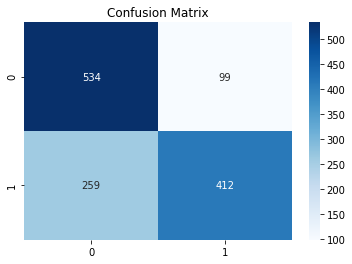

In [130]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression

logr = LogisticRegression()
logr.fit(Xtrain, Ytrain)
pred_logr = logr.predict(Xtest)

score_lr = logr.score(Xtest, Ytest)

print('Logistic Regression:\n')
print('Score:', score_lr)

plt.title('Confusion Matrix')
sb.heatmap(confusion_matrix(Ytest, pred_logr), annot = True, cmap = 'Blues', fmt = 'g')
plt.plot()

Support Vector Classifier:

Score: 0.7269938650306749


[]

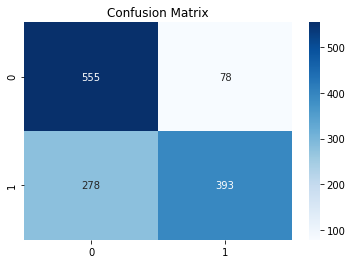

In [131]:
# Support Vector Machine

from sklearn.svm import SVC

svc = SVC()
svc.fit(Xtrain, Ytrain)

pred_svc = svc.predict(Xtest)
score_svc = svc.score(Xtest, Ytest)

print('Support Vector Classifier:\n')
print('Score:', score_svc)

plt.title('Confusion Matrix')
sb.heatmap(confusion_matrix(Ytest, pred_svc), annot = True, cmap = 'Blues', fmt = 'g')
plt.plot()

In [132]:
# Kaggle Testing dataset
# Following code is for the Kaggle Competition Submission Only. 

testing = dataset = pd.read_csv('spaceship_test.csv')

In [163]:
testing.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [133]:
filter_test = testing[filter_columns[:-1]]

In [135]:
filter_test.head()

,HomePlanet,Destination,VIP,CryoSleep,Age
0,Earth,TRAPPIST-1e,False,True,27.0
1,Earth,TRAPPIST-1e,False,False,19.0
2,Europa,55 Cancri e,False,True,31.0
3,Europa,TRAPPIST-1e,False,False,38.0
4,Earth,TRAPPIST-1e,False,False,20.0


In [136]:
# Encoding
enc = LabelEncoder()

filter_test['HomePlanet'] = enc.fit_transform(filter_test['HomePlanet'])
filter_test['Destination'] = enc.fit_transform(filter_test['Destination'])
filter_test['VIP'] = enc.fit_transform(filter_test['VIP'])
filter_test['CryoSleep'] = enc.fit_transform(filter_test['CryoSleep'])

# Filling NaN values with mean value
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
filter_test['Age'] = imp.fit_transform(np.array(filter_test['Age']).reshape(-1,1))

# Scaling
sc = MinMaxScaler()
filter_test['Age'] = sc.fit_transform(np.array(filter_test['Age']).reshape(-1,1))

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)
c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)
c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

In [173]:
filter_test.head()

,HomePlanet,Destination,VIP,CryoSleep,Age
0,0,2,0,1,0.341772
1,0,2,0,0,0.240506
2,1,0,0,1,0.392405
3,1,2,0,0,0.481013
4,0,2,0,0,0.253165


In [138]:
pred_final = svc.predict(filter_test)

In [155]:
predictions = [False if x == 0 else True for x in pred_final]


In [169]:
final_pred_df = pd.DataFrame()
final_pred_df['PassengerId'] = testing['PassengerId']
final_pred_df['Transported'] = predictions

In [171]:
final_pred_df.head(10)

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,False
4,0023_01,False
5,0027_01,False
6,0029_01,True
7,0032_01,True
8,0032_02,True
9,0033_01,False


In [174]:
# Saving Predictions in csv file for the submission

final_pred_df.to_csv('Predictions.csv', index = False)